In [8]:
import cv2
import pytesseract

In [9]:
image = cv2.imread('../images/input/plate4.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply adaptive thresholding to binarize the image
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Find contours in the thresholded image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [10]:
plate_contour = None
for contour in contours:
    # Calculate bounding box for each contour
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / float(h)
    
    # Filter based on size and aspect ratio (typical for license plates)
    if 2 < aspect_ratio < 6 and w > 100:  # You can adjust the aspect ratio and width as per your needs
        plate_contour = contour
        break

In [11]:
if plate_contour is not None:
    # Extract the license plate region
    x, y, w, h = cv2.boundingRect(plate_contour)
    plate_img = image[y:y+h, x:x+w]

    # Use Tesseract to extract text from the plate
    plate_text = pytesseract.image_to_string(plate_img, config='--psm 10').strip()

    print("License Plate Number:", plate_text)
else:
    print("License plate not found.")

License Plate Number: GJO30MP294


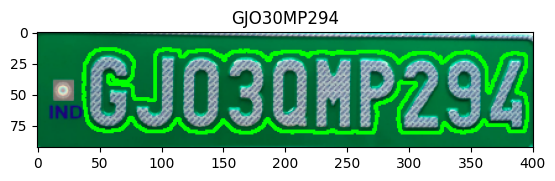

In [14]:
# Display number plate with bounding box and text using matplotlib
import matplotlib.pyplot as plt

image_with_plate = image.copy()
cv2.drawContours(image_with_plate, [plate_contour], -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(image_with_plate, cv2.COLOR_BGR2RGB))
plt.title(plate_text)
plt.show()